In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\Machine Learning\Courses\[GigaCourse.Com] Udemy - 2022 Python for Machine Learning & Data Science Masterclass\Data\DATA\wine_fraud.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_14024\2614188845.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rf.corr(),annot=True)


<Axes: >

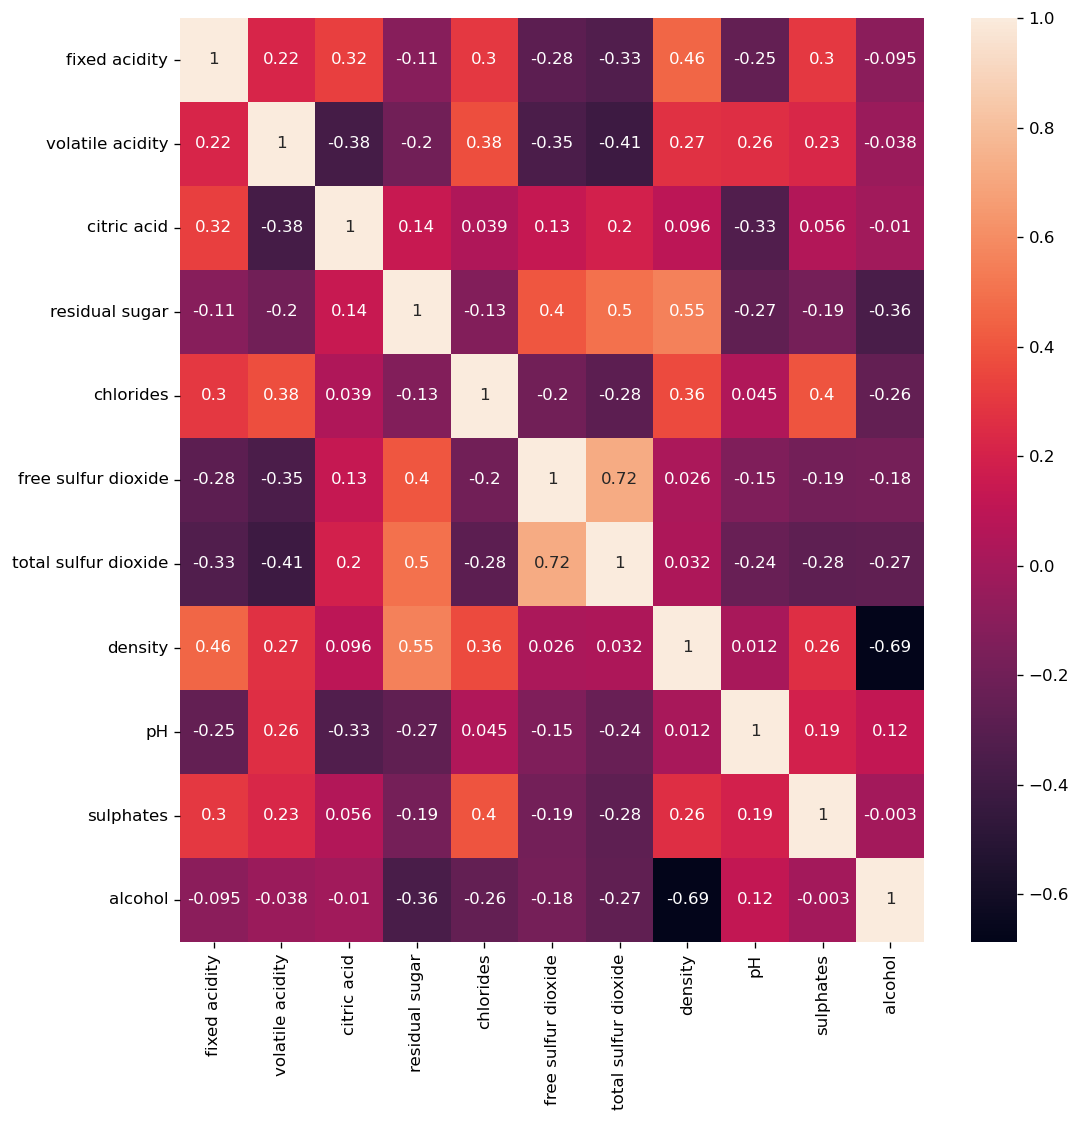

In [17]:
plt.figure(figsize=[10,10],dpi=120)
rf=df.drop('quality',axis=1)
sns.heatmap(rf.corr(),annot=True)

In [19]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<Axes: xlabel='quality', ylabel='count'>

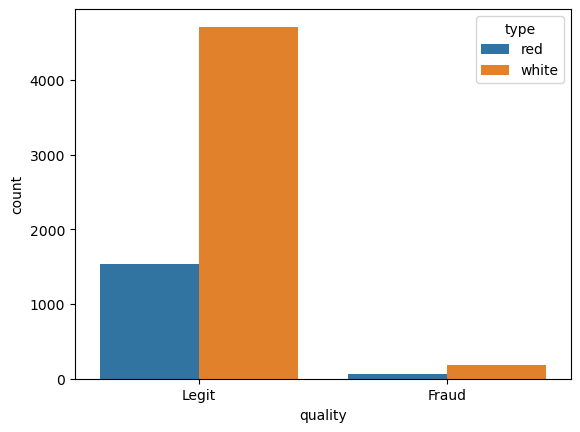

In [24]:
sns.countplot(x='quality',data=df,hue='type')

In [25]:
reds=df[df['type']=='red']
white=df[df['type']=='white']


In [33]:
100*len(reds[reds['quality']=='Fraud'])/len(reds)

3.9399624765478425

In [35]:
df['Fraud']=df['quality'].map({'legit':0,'Fraud':1})

In [37]:
df.corr()['Fraud']

C:\Users\hp\AppData\Local\Temp\ipykernel_14024\1400609001.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Fraud']


fixed acidity          NaN
volatile acidity       NaN
citric acid            NaN
residual sugar         NaN
chlorides              NaN
free sulfur dioxide    NaN
total sulfur dioxide   NaN
density                NaN
pH                     NaN
sulphates              NaN
alcohol                NaN
Fraud                  NaN
Name: Fraud, dtype: float64

In [38]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,NaN


In [39]:
df['type']=df['type'].map({'red':0,'white':1})

In [40]:
df['type']

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: type, Length: 6497, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
df=df.drop('Fraud',axis=1)

In [97]:
X=df.drop('quality',axis=1)

In [98]:
y=df['quality']

In [99]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=101)

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler=StandardScaler()

In [102]:
scaled_X_train=scaler.fit_transform(X_train)

In [103]:
scaled_X_test=scaler.transform(X_test)

In [104]:
from sklearn.svm import SVC

In [105]:
svc=SVC(class_weight='balanced')

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
param_grid={'C':[0.001,0.01,0.1,1]}

In [108]:
grid=GridSearchCV(svc,param_grid)

In [109]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1]})

In [111]:
grid.best_params_

{'C': 1}

In [112]:
from sklearn.metrics import confusion_matrix,classification_report

In [114]:
grid_pred=grid.predict(scaled_X_test)

In [115]:
confusion_matrix(y_test,grid_pred)

array([[  42,   22],
       [ 256, 1630]], dtype=int64)

In [116]:
classification_report(y_test,grid_pred)

'              precision    recall  f1-score   support\n\n       Fraud       0.14      0.66      0.23        64\n       Legit       0.99      0.86      0.92      1886\n\n    accuracy                           0.86      1950\n   macro avg       0.56      0.76      0.58      1950\nweighted avg       0.96      0.86      0.90      1950\n'